Run pip install if there is no uproot package:
```bash
pip install --upgrade uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize
```

In [1]:
pip install --upgrade --user uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize

Requirement already up-to-date: uproot4 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (4.0.0)
Requirement already up-to-date: awkward1 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (1.0.0)
Requirement already up-to-date: particle in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (0.14.0)
Requirement already up-to-date: boost-histogram in /Users/audiobooks/Library/Python/3.8/lib/python/site-packages (0.13.0)
Requirement already up-to-date: matplotlib in /Users/audiobooks/Library/Python/3.8/lib/python/site-packages (3.3.4)
Requirement already up-to-date: mplhep in /Users/audiobooks/Library/Python/3.8/lib/python/site-packages (0.2.16)
Requirement already up-to-date: pandas in /Users/audiobooks/Library/Python/3.8/lib/python/site-packages (1.2.2)
Requirement already up-to-date: numexpr in /Users/audiobooks/Library/Python/3.8/lib/python/site-packages (2.7.2)
Requirement already up-to-date: au

In [2]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [3]:


file=uproot4.open("simple.root")

# To see all object names in the file:
file.items()

# only names: file.keys(), file.values()))

# To see items in subdirectories
# file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files


[('events;1', <TTree 'events' (65 branches) at 0x7ffbf96c5880>)]

In [4]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

# Uncomment this to see all values:
tree.show()


# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html


Number of entries: 261
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event_id             | uint64_t                 | AsDtype('>u8')
evt_true_q2          | double                   | AsDtype('>f8')
evt_true_x           | double                   | AsDtype('>f8')
evt_true_y           | double                   | AsDtype('>f8')
evt_true_w2          | double                   | AsDtype('>f8')
evt_true_nu          | double                   | AsDtype('>f8')
evt_true_t_hat       | double                   | AsDtype('>f8')
evt_has_dis_info     | int8_t                   | AsDtype('int8')
evt_weight           | double                   | AsDtype('>f8')
hit_count            | uint64_t                 | AsDtype('>u8')
hit_id               | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_trk_id           | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hi

```
EVENTS
+---------------------+
| event_id            |
| evt_true_q2         |
| evt_true_x          |
| evt_true_y          |
| evt_true_w2         |
| evt_true_nu         |
| evt_true_t_hat      |
| evt_has_dis_info    |
| evt_weight          |
+---------------------+

GENERATED PARTICLES
Particles that where generated by knowing the theory

+---------------------+
|gen_prt_count        |
|gen_prt_id           |      # Unique number/id of this particle inside the event
|gen_prt_vtx_id       |
|gen_prt_pdg          |      # Type of the particle
|gen_prt_trk_id       |
|gen_prt_charge       |
|gen_prt_dir_x        |
|gen_prt_dir_y        |
|gen_prt_dir_z        |
|gen_prt_tot_mom      |
|gen_prt_tot_e        |      # Particle totoal momentum
|gen_prt_time         |
|gen_prt_polariz_x    |
|gen_prt_polariz_y    |
|gen_prt_polariz_z    |
|gen_vtx_count        |
|gen_vtx_id           |
|gen_vtx_part_count   |
|gen_vtx_x            |
|gen_vtx_y            |
|gen_vtx_z            |
|gen_vtx_time         |
|gen_vtx_weight       |
+---------------------+


TRACKS - Simulated particle tracks in our detector
+---------------------+
|trk_count            |         # A number of tracks in an event
|trk_id               | -+-+    # Unique number/id of this particle inside the event
|trk_pdg              |  | |    # Type of the particle
|trk_parent_id        | -+ |    # Parent id of the particle
|trk_create_proc      |    |
|trk_level            |    |
|trk_vtx_x            |    |
|trk_vtx_y            |    |
|trk_vtx_z            |    |
|trk_vtx_dir_x        |    |    # Track direction x,y,z
|trk_vtx_dir_y        |    |
|trk_vtx_dir_z        |    |
|trk_mom              |    |    # Track momentum
+---------------------+    |
HITS in the detector       |
+---------------------+    |
|hit_count            |    |    # Number of hits in the event
|hit_id               |    |
|hit_trk_id           | ---+
|hit_ptr_id           |
|hit_parent_trk_id    |
|hit_vol_name         |         # Volume name where hit occured
|hit_x                |
|hit_y                |
|hit_z                |
|hit_i_rep            |
|hit_j_rep            |
|hit_e_loss           |
+---------------------+


What was in reality:

event 1
    track 1 - electron 10GeV
        hit_11
        hit_12
        hit_13
    track 2 - proton   100GeV
        hit_21
        hit_22


How we write this data:

event_id = 1
trk_count = 2
trk_id = [1, 2]
trk_pdg = [11, 2112]
trk_mom = [10, 100]
hit_count = 5
hit_...=[...] - array of 5 elements
hit_id = [1, 2, 3, 4, 5]
hit_trk_id = [1, 1, 1, 2, 2]
hit_z = [10, 100, 200, -1, -5]
```

In [5]:
# To load WHOLE data from a branch as an array:
hit_z = tree['hit_z'].array()

# library=np to return/convert array as a numpy library.

# print(hit_xyz)
# print(f"There are total: {len(hit_xyz['hit_x'])} hits records")

# 261
# [[...],[...], .... ]

# for hits_in_event in hit_z:
#    print(f"Hits in the event: {len(hits_in_event)}")

In [6]:
# It is possible to convert multiple branches, apply formulas, aliases, etc.
# arrays method is to be used for this

# Instead of this:
# hit_z = tree['hit_z'].array()
# hit_y = tree['hit_y'].array()
# hit_z = tree['hit_z'].array()

# For numpy:
hits = tree.arrays(filter_name="hit*", library='np')

# The resulting will be a dict like:
# { 'par0': array([ 5.81875  ,  7.471875 ,  ...],
#   'par1': array([ 5., 14.,  3., ... ],
#   ...}

# If you need only arrays, .values() function may be used
# Finally you can unpack it as values (I use only 3 of pars here using [0,1,2] mask)
hits_x, hits_y, hits_z = tree.arrays(filter_name="hit_[x,y,z]", library='np').values()

# Full info on this array methods
# https://uproot.readthedocs.io/en/latest/basic.html#reading-multiple-tbranches-as-a-group-of-arrays


## PLOTTING

[]

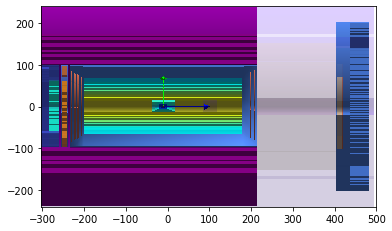

In [7]:
# To show a picture
img = mpimg.imread('central_region.png')

#

plt.imshow(img, interpolation='none', extent=[-302,500,-240,240])
plt.plot()


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe5c9ee20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

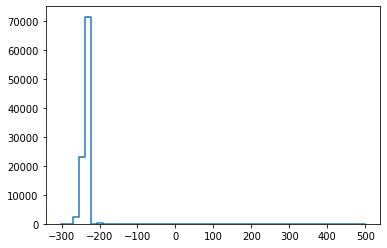

In [8]:
hit_z =tree['hit_z'].array(library='ak')
hit_z=hit_z[hit_z<=-2000]

# fill the axes
h = Hist(
    hist.axis.Regular(
        50, -302, 500, name="Z", label="z [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(hit_z/10)

h.fill(ak.to_numpy(flatten_array))
h.plot()


# More on hist library
# https://hist.readthedocs.io/en/latest/
# https://github.com/scikit-hep/hist

# The library is very new and there might be bugs, there are a couple of other
# libraries that can work with histograms. Let me know



In [9]:
hit_z =tree['hit_z'].array(library='ak')
filter_by_z=hit_z<=-2000


hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')
hit_x=hit_x[filter_by_z]
hit_y=hit_y[filter_by_z]


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ffbe7151280>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ffbe7155910>)

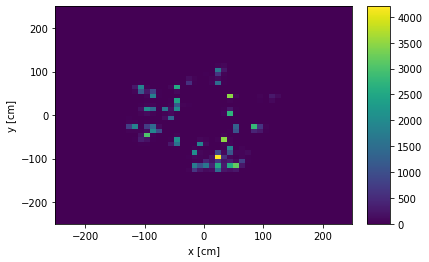

In [10]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
    
)
h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


In [11]:
def filter_by_detector_name(ak_array, name):
    return ak_array[:, :, :len(name)] == name
name=tree['hit_vol_name'].array()
filterByName=filter_by_detector_name(name,'ce_EMCAL')
hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')
hit_x=hit_x[filterByName]
hit_y=hit_y[filterByName]

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ffbeb522250>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ffbeb522640>)

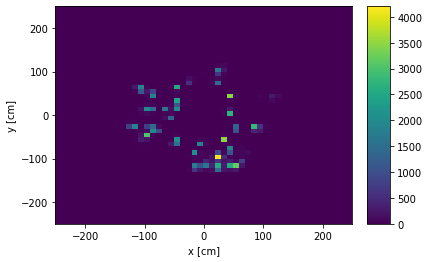

In [12]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
    
)
h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


In [13]:
name=tree['hit_vol_name'].array()
filterByName=filter_by_detector_name(name,'ci_EMCAL')
hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')
hit_x=hit_x[filterByName]
hit_y=hit_y[filterByName]

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ffbeaadf0a0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ffbe6a14580>)

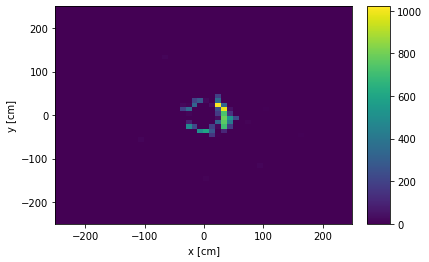

In [14]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
    
)
h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe8ce7d60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

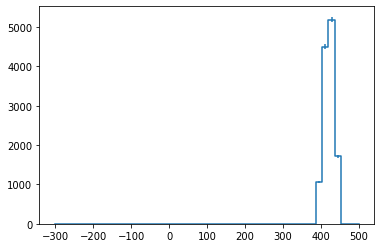

In [15]:
hit_z =tree['hit_z'].array(library='ak')

hit_z=hit_z[filterByName]

h = Hist(
    hist.axis.Regular(
        50, -302, 500, name="Z", label="z [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(hit_z/10)

h.fill(ak.to_numpy(flatten_array))
h.plot()

In [16]:

part=tree['trk_pdg'].array()
filter_proton=part==2212
filter_electron=part==11
filter_pi=part==211
hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')
hit_x=hit_x[filter_proton]
hit_y=hit_y[filter_proton]

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ffbe8c6ca90>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ffbe8c1b640>)

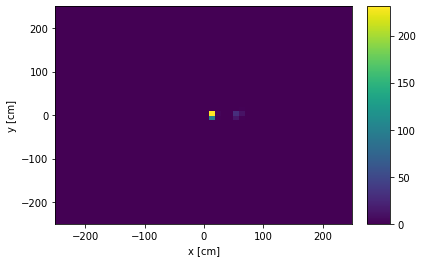

In [17]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
    
)
h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe7328b20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

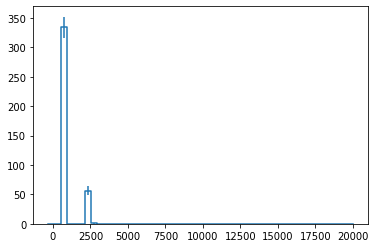

In [18]:
hit_z =tree['hit_z'].array(library='ak')

hit_z=hit_z[filter_proton]

h = Hist(
    hist.axis.Regular(
        50, -302, 20000, name="Z", label="z [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(hit_z/10)

h.fill(ak.to_numpy(flatten_array))
h.plot()

In [19]:
hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')
hit_x=hit_x[filter_electron]
hit_y=hit_y[filter_electron]

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ffbe7158280>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ffbe41df430>)

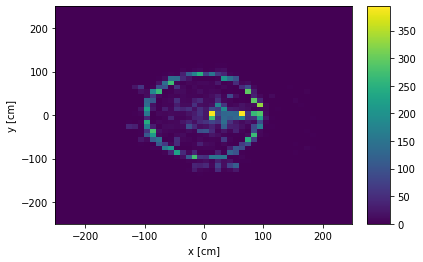

In [20]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
    
)
h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe827b6d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

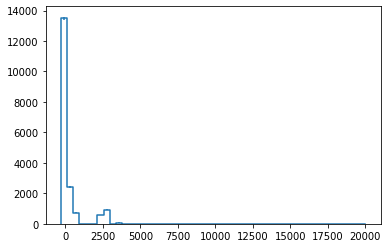

In [21]:
hit_z =tree['hit_z'].array(library='ak')

hit_z=hit_z[filter_electron]

h = Hist(
    hist.axis.Regular(
        50, -302, 20000, name="Z", label="z [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(hit_z/10)

h.fill(ak.to_numpy(flatten_array))
h.plot()

In [22]:
hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')
hit_x=hit_x[filter_pi]
hit_y=hit_y[filter_pi]

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ffbe7824cd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ffbe83ea100>)

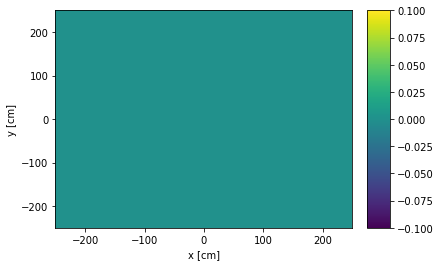

In [23]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
    
)
h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe8549790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

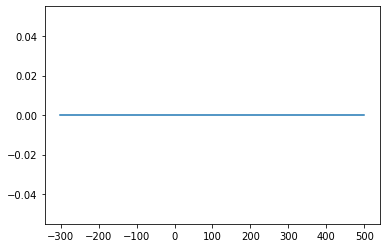

In [24]:
hit_z =tree['hit_z'].array(library='ak')

hit_z=hit_z[filter_pi]

h = Hist(
    hist.axis.Regular(
        50, -302, 500, name="Z", label="z [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(hit_z/10)

h.fill(ak.to_numpy(flatten_array))
h.plot()

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe869f4c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

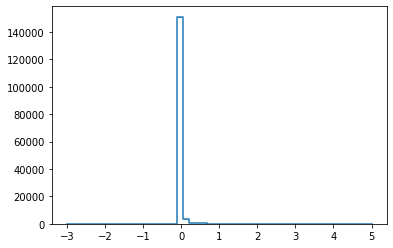

In [25]:
trk_mom=tree['trk_mom'].array(library='ak')
h = Hist(
    hist.axis.Regular(
        50, -3, 5, name="location", label="location from collision [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(trk_mom)

h.fill(ak.to_numpy(flatten_array))
h.plot()

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe8911190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

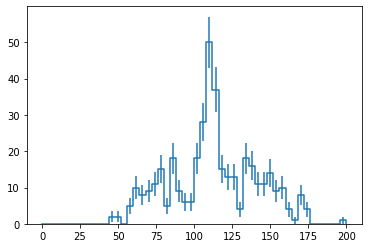

In [26]:
trk_mom=tree['trk_mom'].array(library='ak')
trk_mom=trk_mom[filter_proton]
h = Hist(
    hist.axis.Regular(
        50, 0, 200, name="location", label="location from collision [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(trk_mom)

h.fill(ak.to_numpy(flatten_array))
h.plot()

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe8aa7280>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

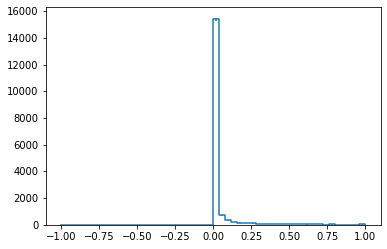

In [27]:
trk_mom=tree['trk_mom'].array(library='ak')
trk_mom=trk_mom[filter_electron]
h = Hist(
    hist.axis.Regular(
        50, -1, 1, name="location", label="location from collision [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(trk_mom)

h.fill(ak.to_numpy(flatten_array))
h.plot()

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7ffbe7ccd430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

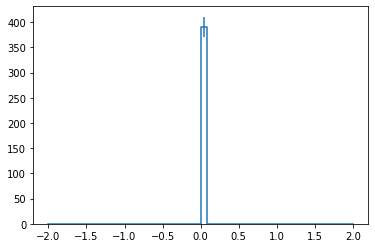

In [31]:
trk_vtx_z=tree['trk_vtx_z'].array(library='ak')
trk_vtx_z=trk_vtx_z[filter_proton]
h = Hist(
    hist.axis.Regular(
        50, -2, 2, name="location", label="location from collision [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(trk_vtx_z)

h.fill(ak.to_numpy(flatten_array))
h.plot()